# 201501489 최영진

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
from collections import Counter
#from linear_algebra import distance, vector_subtract, scalar_multiply

#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [3]:
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

vector = [i for i in range(10)]
sum_of_squares(vector)

np.sum(np.square(vector))


285

285

Text(0.5, 1.0, 'actual Derivatives vs. Estimates')

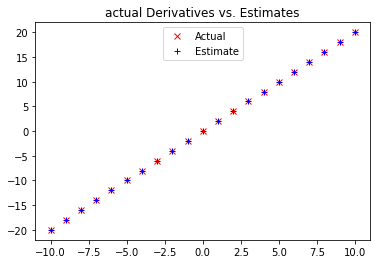

In [6]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

xs = range(-10,11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.0001) for x in xs]

# 두 계산식의 결괏값이 거의 비슷함을 보여 주기 위한 그래프
# plot to show they're basically the same
 
plt.title("actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')      	# red  x
plt.plot(xs, estimates, 'b+', label='Estimate')  	# blue +
plt.legend(loc=9)
plt.show()                                       		# purple *, hopefully


### 다변수 함수의 미분값 근사법

In [7]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]


### 그래디언트 적용하기

In [8]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# 임의의 시작점을 선택
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001   # 아주 작은 e값

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)	# compute the gradient at v
    next_v = step(v, gradient, -0.0001)     	# take a negative gradient step
    if distance(next_v, v) < tolerance:     	# stop if we're converging
        break
    v = next_v                              		# continue if we're not
    #print(v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))


minimum v [0.00029810758723911723, 0.00014905379361955862, 0.00037263448404890084]
minimum value 2.499416256643004e-07


### 경사 하강법으로 모델 학습

In [9]:
# Using gradient descent to fit models

def gradient_step(v, gradient, step_size):
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return vector_add(v, step)

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]
print(inputs)

#def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
def linear_gradient(x, y, theta):
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad


[(-50, -995), (-49, -975), (-48, -955), (-47, -935), (-46, -915), (-45, -895), (-44, -875), (-43, -855), (-42, -835), (-41, -815), (-40, -795), (-39, -775), (-38, -755), (-37, -735), (-36, -715), (-35, -695), (-34, -675), (-33, -655), (-32, -635), (-31, -615), (-30, -595), (-29, -575), (-28, -555), (-27, -535), (-26, -515), (-25, -495), (-24, -475), (-23, -455), (-22, -435), (-21, -415), (-20, -395), (-19, -375), (-18, -355), (-17, -335), (-16, -315), (-15, -295), (-14, -275), (-13, -255), (-12, -235), (-11, -215), (-10, -195), (-9, -175), (-8, -155), (-7, -135), (-6, -115), (-5, -95), (-4, -75), (-3, -55), (-2, -35), (-1, -15), (0, 5), (1, 25), (2, 45), (3, 65), (4, 85), (5, 105), (6, 125), (7, 145), (8, 165), (9, 185), (10, 205), (11, 225), (12, 245), (13, 265), (14, 285), (15, 305), (16, 325), (17, 345), (18, 365), (19, 385), (20, 405), (21, 425), (22, 445), (23, 465), (24, 485), (25, 505), (26, 525), (27, 545), (28, 565), (29, 585), (30, 605), (31, 625), (32, 645), (33, 665), (34, 

In [13]:
#from linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = .001

for epoch in range(5000):
    # Computer the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


0 [33.02669543995332, -0.6395008499923355]
1 [11.305554640701143, -0.6151951528523975]
2 [25.793579859499488, -0.6126592079059916]
3 [16.130069574505935, -0.5956403096306802]
4 [22.57564795349491, -0.5883189594369129]
5 [18.276454496059458, -0.5745666735645442]
6 [21.144030284454775, -0.5651410857213557]
7 [19.231366659182946, -0.5528667732654582]
8 [20.507125571551708, -0.5425296730597443]
9 [19.656204714101953, -0.5309374881420731]
10 [20.223780518205857, -0.520219408451687]
11 [19.845218174948243, -0.5089551891165778]
12 [20.097730522120404, -0.49809206056339633]
13 [19.929315649685126, -0.4869981459201491]
14 [20.0416594635141, -0.47609483397862373]
15 [19.966737043002116, -0.46510098484715234]
16 [20.016721291332743, -0.45420404583445595]
17 [19.983392694635224, -0.44327891645145434]
18 [20.005633793761852, -0.43240896592391614]
19 [19.99080985059492, -0.4215385141983064]
20 [20.000708291138988, -0.41070462731931484]
21 [19.994116865182978, -0.39988250977353723]
22 [19.99852416841

534 [19.998838359348433, 3.0658676174594524]
535 [19.998840681932055, 3.069734720583882]
536 [19.998842999871904, 3.073594091824646]
537 [19.998845313177263, 3.0774457466408687]
538 [19.998847621857408, 3.0812897004607644]
539 [19.99884992592157, 3.0851259686817003]
540 [19.998852225378997, 3.0889545666702585]
541 [19.99885452023888, 3.092775509762297]
542 [19.99885681051043, 3.0965888132630113]
543 [19.998859096202807, 3.1003944924469957]
544 [19.998861377325174, 3.1041925625583047]
545 [19.99886365388667, 3.1079830388105134]
546 [19.998865925896403, 3.111765936386779]
547 [19.998868193363485, 3.115541270439902]
548 [19.998870456296995, 3.1193090560923857]
549 [19.998872714705996, 3.123069308436498]
550 [19.998874968599537, 3.1268220425343314]
551 [19.998877217986642, 3.1305672734178622]
552 [19.998879462876328, 3.134305016089013]
553 [19.99888170327758, 3.1380352855197113]
554 [19.998883939199374, 3.1417580966519494]
555 [19.99888617065067, 3.145473464397845]
556 [19.9988883976404, 3

1042 [19.999579738557703, 4.300264446166231]
1043 [19.99958057882818, 4.3016634970124565]
1044 [19.999581417418618, 4.30305975059726]
1045 [19.999582254332378, 4.304453212513484]
1046 [19.999583089572816, 4.305843888342789]
1047 [19.999583923143273, 4.307231783655676]
1048 [19.999584755047092, 4.308616904011508]
1049 [19.9995855852876, 4.309999254958532]
1050 [19.999586413868126, 4.3113788420339025]
1051 [19.999587240791993, 4.3127556707637025]
1052 [19.999588066062504, 4.314129746662967]
1053 [19.999588889682972, 4.315501075235704]
1054 [19.999589711656693, 4.316869661974915]
1055 [19.99959053198696, 4.318235512362622]
1056 [19.99959135067706, 4.319598631869884]
1057 [19.99959216773027, 4.320959025956821]
1058 [19.999592983149867, 4.322316700072638]
1059 [19.999593796939113, 4.323671659655642]
1060 [19.999594609101266, 4.32502391013327]
1061 [19.99959541963959, 4.326373456922105]
1062 [19.999596228557316, 4.3277203054279]
1063 [19.999597035857697, 4.3290644610456015]
1064 [19.99959784

1574 [19.999855087264358, 4.7587202081187]
1575 [19.999855377002792, 4.7592026227897275]
1576 [19.999855666161928, 4.759684072921151]
1577 [19.999855954742916, 4.760164560441471]
1578 [19.999856242746915, 4.76064408727533]
1579 [19.999856530175084, 4.761122655343526]
1580 [19.99985681702856, 4.761600266563015]
1581 [19.999857103308514, 4.7620769228469175]
1582 [19.999857389016068, 4.762552626104532]
1583 [19.999857674152388, 4.763027378241339]
1584 [19.9998579587186, 4.7635011811590084]
1585 [19.999858242715852, 4.763974036755409]
1586 [19.99985852614528, 4.764445946924614]
1587 [19.99985880900802, 4.76491691355691]
1588 [19.999859091305208, 4.7653869385388035]
1589 [19.999859373037964, 4.765856023753031]
1590 [19.99985965420743, 4.766324171078563]
1591 [19.999859934814722, 4.766791382390613]
1592 [19.99986021486097, 4.767257659560647]
1593 [19.999860494347292, 4.7677230044563865]
1594 [19.99986077327481, 4.768187418941821]
1595 [19.999861051644643, 4.768650904877212]
1596 [19.99986132

2150 [19.99995424391269, 4.923816087150341]
2151 [19.999954335397387, 4.9239684092199525]
2152 [19.999954426699162, 4.92412042673691]
2153 [19.999954517818395, 4.924272140310135]
2154 [19.99995460875544, 4.924423550547333]
2155 [19.999954699510667, 4.924574658054994]
2156 [19.99995479008444, 4.924725463438395]
2157 [19.999954880477116, 4.9248759673016025]
2158 [19.999954970689064, 4.9250261702474765]
2159 [19.99995506072064, 4.925176072877671]
2160 [19.99995515057221, 4.925325675792636]
2161 [19.99995524024413, 4.925474979591623]
2162 [19.999955329736757, 4.925623984872685]
2163 [19.999955419050455, 4.925772692232676]
2164 [19.99995550818558, 4.925921102267261]
2165 [19.999955597142485, 4.926069215570912]
2166 [19.999955685921535, 4.926217032736913]
2167 [19.999955774523073, 4.92636455435736]
2168 [19.999955862947466, 4.9265117810231684]
2169 [19.999955951195062, 4.92665871332407]
2170 [19.999956039266216, 4.926805351848617]
2171 [19.999956127161283, 4.926951697184186]
2172 [19.9999562

2722 [19.999985436425078, 4.975751639008967]
2723 [19.99998546554348, 4.975800121167374]
2724 [19.999985494603663, 4.975848506390583]
2725 [19.999985523605748, 4.975896794872406]
2726 [19.999985552549838, 4.975944986806267]
2727 [19.999985581436064, 4.975993082385204]
2728 [19.99998561026453, 4.97604108180187]
2729 [19.99998563903536, 4.976088985248531]
2730 [19.999985667748664, 4.976136792917069]
2731 [19.999985696404558, 4.976184504998984]
2732 [19.99998572500316, 4.97623212168539]
2733 [19.99998575354458, 4.976279643167023]
2734 [19.999985782028933, 4.976327069634233]
2735 [19.999985810456337, 4.976374401276994]
2736 [19.9999858388269, 4.976421638284896]
2737 [19.999985867140744, 4.976468780847154]
2738 [19.99998589539797, 4.9765158291526]
2739 [19.999985923598707, 4.976562783389693]
2740 [19.999985951743053, 4.976609643746513]
2741 [19.99998597983113, 4.9766564104107625]
2742 [19.999986007863047, 4.976703083569772]
2743 [19.99998603583892, 4.976749663410495]
2744 [19.99998606375885

3271 [19.999995146236095, 4.991918480181505]
3272 [19.999995155940706, 4.991934638367378]
3273 [19.99999516562592, 4.991950764246584]
3274 [19.999995175291758, 4.9919668578837175]
3275 [19.99999518493828, 4.991982919343242]
3276 [19.99999519456551, 4.991998948689494]
3277 [19.999995204173494, 4.99201494598668]
3278 [19.999995213762265, 4.9920309112988805]
3279 [19.99999522333187, 4.992046844690045]
3280 [19.999995232882334, 4.992062746223997]
3281 [19.999995242413707, 4.992078615964432]
3282 [19.999995251926023, 4.992094453974916]
3283 [19.99999526141932, 4.992110260318892]
3284 [19.999995270893635, 4.992126035059673]
3285 [19.999995280349005, 4.992141778260447]
3286 [19.999995289785474, 4.992157489984275]
3287 [19.999995299203075, 4.992173170294092]
3288 [19.999995308601843, 4.992188819252707]
3289 [19.999995317981824, 4.992204436922804]
3290 [19.999995327343047, 4.99222002336694]
3291 [19.999995336685554, 4.992235578647549]
3292 [19.999995346009385, 4.99225110282694]
3293 [19.9999953

3811 [19.999998352929925, 4.997257627331543]
3812 [19.99999835622307, 4.99726311042981]
3813 [19.999998359509643, 4.997268582565174]
3814 [19.999998362789633, 4.997274043759553]
3815 [19.999998366063075, 4.9972794940348235]
3816 [19.999998369329965, 4.997284933412817]
3817 [19.999998372590326, 4.997290361915321]
3818 [19.999998375844168, 4.997295779564081]
3819 [19.999998379091505, 4.997301186380797]
3820 [19.999998382332347, 4.997306582387127]
3821 [19.999998385566712, 4.997311967604685]
3822 [19.99999838879461, 4.997317342055043]
3823 [19.99999839201605, 4.997322705759728]
3824 [19.999998395231056, 4.997328058740224]
3825 [19.999998398439626, 4.997333401017975]
3826 [19.999998401641786, 4.997338732614378]
3827 [19.999998404837545, 4.997344053550791]
3828 [19.999998408026908, 4.997349363848527]
3829 [19.9999984112099, 4.997354663528857]
3830 [19.999998414386525, 4.997359952613009]
3831 [19.9999984175568, 4.99736523112217]
3832 [19.999998420720736, 4.9973704990774825]
3833 [19.99999842

4353 [19.999999443318085, 4.999073124277649]
4354 [19.999999444431115, 4.999074977472412]
4355 [19.999999445541917, 4.999076826961898]
4356 [19.999999446650502, 4.999078672753516]
4357 [19.99999944775687, 4.9990805148546595]
4358 [19.999999448861022, 4.999082353272707]
4359 [19.99999944996297, 4.999084188015022]
4360 [19.999999451062713, 4.9990860190889554]
4361 [19.99999945216026, 4.9990878465018405]
4362 [19.999999453255608, 4.999089670260997]
4363 [19.99999945434877, 4.99909149037373]
4364 [19.999999455439745, 4.999093306847331]
4365 [19.99999945652854, 4.999095119689076]
4366 [19.999999457615154, 4.999096928906226]
4367 [19.999999458699598, 4.999098734506029]
4368 [19.999999459781876, 4.999100536495717]
4369 [19.999999460861986, 4.999102334882507]
4370 [19.99999946193994, 4.999104129673604]
4371 [19.999999463015733, 4.999105920876197]
4372 [19.99999946408938, 4.99910770849746]
4373 [19.99999946516088, 4.999109492544554]
4374 [19.99999946623024, 4.999111273024626]
4375 [19.999999467

4879 [19.999999805728404, 4.999676537678338]
4880 [19.999999806116833, 4.99967718440871]
4881 [19.99999980650448, 4.999677829846009]
4882 [19.999999806891356, 4.999678473992821]
4883 [19.999999807277458, 4.999679116851727]
4884 [19.99999980766279, 4.999679758425301]
4885 [19.999999808047345, 4.999680398716113]
4886 [19.999999808431138, 4.999681037726728]
4887 [19.99999980881416, 4.999681675459706]
4888 [19.999999809196414, 4.9996823119176]
4889 [19.99999980957791, 4.999682947102961]
4890 [19.999999809958638, 4.999683581018333]
4891 [19.999999810338608, 4.999684213666255]
4892 [19.999999810717814, 4.999684845049261]
4893 [19.999999811096266, 4.999685475169881]
4894 [19.99999981147396, 4.999686104030637]
4895 [19.9999998118509, 4.99968673163405]
4896 [19.999999812227085, 4.999687357982633]
4897 [19.999999812602518, 4.9996879830788945]
4898 [19.9999998129772, 4.999688606925339]
4899 [19.99999981335113, 4.999689229524466]
4900 [19.99999981372432, 4.999689850878768]
4901 [19.999999814096757

### 미니 배치 경사 하강법과 경사하강법

In [14]:
# Minibatch and Stochastic Gradient Descent
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size = 20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"


0 [18.71998639898301, 1.0151085313356347]
1 [19.677297225506376, 1.0102264569287773]
2 [20.62866835656384, 1.0294303025778875]
3 [19.152156191047983, 1.1003280739211652]
4 [20.084540056834907, 0.8261311251563717]
5 [20.30073135140666, 0.8386298141997149]
6 [19.847807362412535, 1.0262845868864947]
7 [20.622294037853088, 1.0699110730677857]
8 [19.900976515143114, 1.2654191438012619]
9 [19.144281500457176, 1.3054825511402224]
10 [20.07706085660283, 1.0402831567769661]
11 [19.844316947941202, 1.1105977764849548]
12 [19.767670834650502, 1.119260849640867]
13 [19.750860981968724, 1.1271148145857968]
14 [20.238043223259993, 1.1654613119488544]
15 [20.260541598093074, 1.1903072491658302]
16 [19.87533039546688, 1.2941851185335183]
17 [20.12166833577273, 1.338516582530334]
18 [20.267421310688878, 1.3487854430960362]
19 [20.05991706235384, 1.3692343460564445]
20 [20.548842041167223, 1.4414839551290204]
21 [19.924756703337756, 1.5294366092643905]
22 [20.16163625015028, 1.5389571217187858]
23 [20.0

508 [20.00010470820273, 4.997334472881594]
509 [19.999904392806158, 4.997450775947774]
510 [19.999733805389507, 4.997472537339112]
511 [19.999612631090514, 4.997558534680635]
512 [20.000037365271275, 4.997600722534557]
513 [19.999862131339466, 4.997608105900364]
514 [20.00099262395708, 4.99766546943755]
515 [20.00017156581841, 4.997503592115712]
516 [20.000013803660615, 4.997618684622159]
517 [20.000012971458464, 4.997632744890574]
518 [20.000375967621167, 4.997674991942073]
519 [20.000387656058095, 4.9977734645184295]
520 [20.00006652528614, 4.997755715545626]
521 [19.999478942899522, 4.997786479480451]
522 [19.999933448973028, 4.997762948871169]
523 [20.000074638253533, 4.997793861566538]
524 [19.99990256691544, 4.997798549712429]
525 [19.999898514044457, 4.997896457538351]
526 [20.000001383165745, 4.997911761081991]
527 [20.00000841976196, 4.997924570840874]
528 [19.99987679114474, 4.997930416540238]
529 [20.000090693245152, 4.99793244137954]
530 [20.00082627308758, 4.99798880205382

In [12]:
print("201501489 최영진")

201501489 최영진
